In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('feature.csv',index_col=-1)
print(df.head())

       Cured  Confirmed  Deaths  mortal_rate  cured_rate  \
index                                                      
0          0          1       0          0.0         0.0   
1          0          1       0          0.0         0.0   
2          0          2       0          0.0         0.0   
3          0          3       0          0.0         0.0   
4          0          3       0          0.0         0.0   

       confirmation_increase_rate  cured_increase_rate  Kerala_con  \
index                                                                
0                        0.000000                  0.0           1   
1                        0.000000                  0.0           1   
2                        0.500000                  0.0           2   
3                        0.333333                  0.0           3   
4                        0.000000                  0.0           3   

       Kerala_death  Kerala_rec  ...  Dadar Nagar Haveli_con  \
index                   

In [3]:
y=df[["Confirmed","Deaths","Cured"]].values

In [4]:
df_k=df.drop(["Confirmed","Deaths","Cured"],axis=1)

In [5]:
X=df_k.values

In [6]:
print(df_k.head())

       mortal_rate  cured_rate  confirmation_increase_rate  \
index                                                        
0              0.0         0.0                    0.000000   
1              0.0         0.0                    0.000000   
2              0.0         0.0                    0.500000   
3              0.0         0.0                    0.333333   
4              0.0         0.0                    0.000000   

       cured_increase_rate  Kerala_con  Kerala_death  Kerala_rec  \
index                                                              
0                      0.0           1             0           0   
1                      0.0           1             0           0   
2                      0.0           2             0           0   
3                      0.0           3             0           0   
4                      0.0           3             0           0   

       Telengana_con  Telengana_death  Telengana_rec  ...  \
index                      

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal',input_dim = 116, activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(3, kernel_initializer='normal',activation='linear'))
    
    mod.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    
    return mod

Using TensorFlow backend.


In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)

In [11]:
results=regressor.fit(X_train,y_train)

W0606 23:32:44.805825 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0606 23:32:44.835936 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0606 23:32:45.116754 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0606 23:32:45.236035 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3744      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total para

W0606 23:32:45.644785 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0606 23:32:45.870396 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0606 23:32:46.204119 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0606 23:32:46.211006 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0606 23:32:46.212301 139653629003584 module_wrapper.py:139] From /usr/local/li

Epoch 1/2000


W0606 23:32:49.410424 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0606 23:32:49.412945 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0606 23:32:49.768132 139653629003584 module_wrapper.py:139] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



102/102 [==============================] - 5s 45ms/step - loss: 18422.3396 - acc: 0.9314 - mean_absolute_error: 18422.3396
Epoch 2/2000
102/102 [==============================] - 0s 307us/step - loss: 17892.7179 - acc: 1.0000 - mean_absolute_error: 17892.7179
Epoch 3/2000
102/102 [==============================] - 0s 273us/step - loss: 15660.9801 - acc: 1.0000 - mean_absolute_error: 15660.9801
Epoch 4/2000
102/102 [==============================] - 0s 301us/step - loss: 8655.5584 - acc: 1.0000 - mean_absolute_error: 8655.5584
Epoch 5/2000
102/102 [==============================] - 0s 265us/step - loss: 4541.0461 - acc: 1.0000 - mean_absolute_error: 4541.0461
Epoch 6/2000
102/102 [==============================] - 0s 287us/step - loss: 3389.2954 - acc: 1.0000 - mean_absolute_error: 3389.2954
Epoch 7/2000
102/102 [==============================] - 0s 274us/step - loss: 3469.6482 - acc: 1.0000 - mean_absolute_error: 3469.6482
Epoch 8/2000
102/102 [==============================] - 0s 332u

102/102 [==============================] - 0s 296us/step - loss: 1256.5983 - acc: 1.0000 - mean_absolute_error: 1256.5983
Epoch 62/2000
102/102 [==============================] - 0s 305us/step - loss: 1446.1594 - acc: 1.0000 - mean_absolute_error: 1446.1594
Epoch 63/2000
102/102 [==============================] - 0s 285us/step - loss: 1568.4183 - acc: 1.0000 - mean_absolute_error: 1568.4183
Epoch 64/2000
102/102 [==============================] - 0s 265us/step - loss: 1240.0754 - acc: 1.0000 - mean_absolute_error: 1240.0754
Epoch 65/2000
102/102 [==============================] - 0s 254us/step - loss: 1249.3828 - acc: 1.0000 - mean_absolute_error: 1249.3828
Epoch 66/2000
102/102 [==============================] - 0s 268us/step - loss: 1210.3481 - acc: 1.0000 - mean_absolute_error: 1210.3481
Epoch 67/2000
102/102 [==============================] - 0s 260us/step - loss: 1313.0180 - acc: 1.0000 - mean_absolute_error: 1313.0180
Epoch 68/2000
102/102 [==============================] - 0s 25

102/102 [==============================] - 0s 234us/step - loss: 1215.1396 - acc: 1.0000 - mean_absolute_error: 1215.1396
Epoch 122/2000
102/102 [==============================] - 0s 279us/step - loss: 1226.0460 - acc: 1.0000 - mean_absolute_error: 1226.0460
Epoch 123/2000
102/102 [==============================] - 0s 286us/step - loss: 1239.2540 - acc: 1.0000 - mean_absolute_error: 1239.2540
Epoch 124/2000
102/102 [==============================] - 0s 277us/step - loss: 1286.2593 - acc: 1.0000 - mean_absolute_error: 1286.2593
Epoch 125/2000
102/102 [==============================] - 0s 333us/step - loss: 1102.7467 - acc: 1.0000 - mean_absolute_error: 1102.7467
Epoch 126/2000
102/102 [==============================] - 0s 210us/step - loss: 1297.1430 - acc: 1.0000 - mean_absolute_error: 1297.1430
Epoch 127/2000
102/102 [==============================] - 0s 295us/step - loss: 1232.9126 - acc: 1.0000 - mean_absolute_error: 1232.9126
Epoch 128/2000
102/102 [==============================] 

102/102 [==============================] - 0s 250us/step - loss: 1086.4680 - acc: 1.0000 - mean_absolute_error: 1086.4680
Epoch 181/2000
102/102 [==============================] - 0s 279us/step - loss: 1154.9594 - acc: 1.0000 - mean_absolute_error: 1154.9594
Epoch 182/2000
102/102 [==============================] - 0s 292us/step - loss: 1534.6585 - acc: 1.0000 - mean_absolute_error: 1534.6585
Epoch 183/2000
102/102 [==============================] - 0s 285us/step - loss: 1411.2113 - acc: 1.0000 - mean_absolute_error: 1411.2113
Epoch 184/2000
102/102 [==============================] - 0s 253us/step - loss: 1545.5591 - acc: 1.0000 - mean_absolute_error: 1545.5591
Epoch 185/2000
102/102 [==============================] - 0s 271us/step - loss: 1208.3752 - acc: 1.0000 - mean_absolute_error: 1208.3752
Epoch 186/2000
102/102 [==============================] - 0s 270us/step - loss: 1451.0589 - acc: 1.0000 - mean_absolute_error: 1451.0589
Epoch 187/2000
102/102 [==============================] 

102/102 [==============================] - 0s 238us/step - loss: 1469.4718 - acc: 1.0000 - mean_absolute_error: 1469.4718
Epoch 240/2000
102/102 [==============================] - 0s 259us/step - loss: 1444.4627 - acc: 1.0000 - mean_absolute_error: 1444.4627
Epoch 241/2000
102/102 [==============================] - 0s 253us/step - loss: 1195.2993 - acc: 1.0000 - mean_absolute_error: 1195.2993
Epoch 242/2000
102/102 [==============================] - 0s 258us/step - loss: 1077.4022 - acc: 1.0000 - mean_absolute_error: 1077.4022
Epoch 243/2000
102/102 [==============================] - 0s 273us/step - loss: 1120.0498 - acc: 1.0000 - mean_absolute_error: 1120.0498
Epoch 244/2000
102/102 [==============================] - 0s 292us/step - loss: 1210.1111 - acc: 1.0000 - mean_absolute_error: 1210.1111
Epoch 245/2000
102/102 [==============================] - 0s 283us/step - loss: 1144.1458 - acc: 1.0000 - mean_absolute_error: 1144.1458
Epoch 246/2000
102/102 [==============================] 

102/102 [==============================] - 0s 237us/step - loss: 1973.4458 - acc: 1.0000 - mean_absolute_error: 1973.4458
Epoch 299/2000
102/102 [==============================] - 0s 248us/step - loss: 1488.8240 - acc: 1.0000 - mean_absolute_error: 1488.8240
Epoch 300/2000
102/102 [==============================] - 0s 239us/step - loss: 1204.1566 - acc: 1.0000 - mean_absolute_error: 1204.1566
Epoch 301/2000
102/102 [==============================] - 0s 279us/step - loss: 1138.4245 - acc: 1.0000 - mean_absolute_error: 1138.4245
Epoch 302/2000
102/102 [==============================] - 0s 303us/step - loss: 1323.0991 - acc: 1.0000 - mean_absolute_error: 1323.0991
Epoch 303/2000
102/102 [==============================] - 0s 276us/step - loss: 1361.9270 - acc: 1.0000 - mean_absolute_error: 1361.9270
Epoch 304/2000
102/102 [==============================] - 0s 296us/step - loss: 1419.0451 - acc: 1.0000 - mean_absolute_error: 1419.0451
Epoch 305/2000
102/102 [==============================] 

102/102 [==============================] - 0s 248us/step - loss: 1222.8648 - acc: 1.0000 - mean_absolute_error: 1222.8648
Epoch 358/2000
102/102 [==============================] - 0s 253us/step - loss: 1081.2883 - acc: 1.0000 - mean_absolute_error: 1081.2883
Epoch 359/2000
102/102 [==============================] - 0s 250us/step - loss: 1100.3292 - acc: 1.0000 - mean_absolute_error: 1100.3292
Epoch 360/2000
102/102 [==============================] - 0s 277us/step - loss: 1164.8328 - acc: 1.0000 - mean_absolute_error: 1164.8328
Epoch 361/2000
102/102 [==============================] - 0s 248us/step - loss: 1260.6290 - acc: 1.0000 - mean_absolute_error: 1260.6290
Epoch 362/2000
102/102 [==============================] - 0s 273us/step - loss: 1087.1731 - acc: 1.0000 - mean_absolute_error: 1087.1731
Epoch 363/2000
102/102 [==============================] - 0s 296us/step - loss: 1032.8407 - acc: 1.0000 - mean_absolute_error: 1032.8407
Epoch 364/2000
102/102 [==============================] 

102/102 [==============================] - 0s 237us/step - loss: 1144.4272 - acc: 1.0000 - mean_absolute_error: 1144.4272
Epoch 417/2000
102/102 [==============================] - 0s 258us/step - loss: 1233.1776 - acc: 1.0000 - mean_absolute_error: 1233.1776
Epoch 418/2000
102/102 [==============================] - 0s 256us/step - loss: 1227.5618 - acc: 1.0000 - mean_absolute_error: 1227.5618
Epoch 419/2000
102/102 [==============================] - 0s 276us/step - loss: 1145.8823 - acc: 1.0000 - mean_absolute_error: 1145.8823
Epoch 420/2000
102/102 [==============================] - 0s 277us/step - loss: 1079.2721 - acc: 1.0000 - mean_absolute_error: 1079.2721
Epoch 421/2000
102/102 [==============================] - 0s 269us/step - loss: 1027.6350 - acc: 1.0000 - mean_absolute_error: 1027.6350
Epoch 422/2000
102/102 [==============================] - 0s 261us/step - loss: 1196.7925 - acc: 1.0000 - mean_absolute_error: 1196.7925
Epoch 423/2000
102/102 [==============================] 

102/102 [==============================] - 0s 301us/step - loss: 1220.2417 - acc: 1.0000 - mean_absolute_error: 1220.2417
Epoch 476/2000
102/102 [==============================] - 0s 284us/step - loss: 1238.0553 - acc: 1.0000 - mean_absolute_error: 1238.0553
Epoch 477/2000
102/102 [==============================] - 0s 245us/step - loss: 1421.4747 - acc: 1.0000 - mean_absolute_error: 1421.4747
Epoch 478/2000
102/102 [==============================] - 0s 255us/step - loss: 1422.4808 - acc: 1.0000 - mean_absolute_error: 1422.4808
Epoch 479/2000
102/102 [==============================] - 0s 312us/step - loss: 1374.0278 - acc: 1.0000 - mean_absolute_error: 1374.0278
Epoch 480/2000
102/102 [==============================] - 0s 275us/step - loss: 1542.0692 - acc: 1.0000 - mean_absolute_error: 1542.0692
Epoch 481/2000
102/102 [==============================] - 0s 301us/step - loss: 1558.6791 - acc: 1.0000 - mean_absolute_error: 1558.6791
Epoch 482/2000
102/102 [==============================] 

102/102 [==============================] - 0s 278us/step - loss: 1108.4218 - acc: 1.0000 - mean_absolute_error: 1108.4218
Epoch 535/2000
102/102 [==============================] - 0s 280us/step - loss: 1056.5336 - acc: 1.0000 - mean_absolute_error: 1056.5336
Epoch 536/2000
102/102 [==============================] - 0s 266us/step - loss: 1136.0528 - acc: 1.0000 - mean_absolute_error: 1136.0528
Epoch 537/2000
102/102 [==============================] - 0s 290us/step - loss: 1075.6154 - acc: 1.0000 - mean_absolute_error: 1075.6154
Epoch 538/2000
102/102 [==============================] - 0s 291us/step - loss: 1221.7559 - acc: 1.0000 - mean_absolute_error: 1221.7559
Epoch 539/2000
102/102 [==============================] - 0s 292us/step - loss: 1126.5897 - acc: 1.0000 - mean_absolute_error: 1126.5897
Epoch 540/2000
102/102 [==============================] - 0s 314us/step - loss: 1080.5980 - acc: 1.0000 - mean_absolute_error: 1080.5980
Epoch 541/2000
102/102 [==============================] 

102/102 [==============================] - 0s 210us/step - loss: 743.7478 - acc: 1.0000 - mean_absolute_error: 743.7478
Epoch 595/2000
102/102 [==============================] - 0s 281us/step - loss: 1448.4633 - acc: 1.0000 - mean_absolute_error: 1448.4633
Epoch 596/2000
102/102 [==============================] - 0s 299us/step - loss: 792.3925 - acc: 1.0000 - mean_absolute_error: 792.3925
Epoch 597/2000
102/102 [==============================] - 0s 270us/step - loss: 564.9317 - acc: 1.0000 - mean_absolute_error: 564.9317
Epoch 598/2000
102/102 [==============================] - 0s 270us/step - loss: 413.3918 - acc: 1.0000 - mean_absolute_error: 413.3918
Epoch 599/2000
102/102 [==============================] - 0s 269us/step - loss: 348.3401 - acc: 1.0000 - mean_absolute_error: 348.3401
Epoch 600/2000
102/102 [==============================] - 0s 290us/step - loss: 448.4344 - acc: 1.0000 - mean_absolute_error: 448.4344
Epoch 601/2000
102/102 [==============================] - 0s 271us/s

102/102 [==============================] - 0s 256us/step - loss: 381.7003 - acc: 1.0000 - mean_absolute_error: 381.7003
Epoch 655/2000
102/102 [==============================] - 0s 276us/step - loss: 380.7626 - acc: 1.0000 - mean_absolute_error: 380.7626
Epoch 656/2000
102/102 [==============================] - 0s 271us/step - loss: 283.3061 - acc: 1.0000 - mean_absolute_error: 283.3061
Epoch 657/2000
102/102 [==============================] - 0s 252us/step - loss: 210.5727 - acc: 1.0000 - mean_absolute_error: 210.5727
Epoch 658/2000
102/102 [==============================] - 0s 274us/step - loss: 423.9369 - acc: 1.0000 - mean_absolute_error: 423.9369
Epoch 659/2000
102/102 [==============================] - 0s 285us/step - loss: 380.4689 - acc: 1.0000 - mean_absolute_error: 380.4689
Epoch 660/2000
102/102 [==============================] - 0s 291us/step - loss: 381.4056 - acc: 1.0000 - mean_absolute_error: 381.4056
Epoch 661/2000
102/102 [==============================] - 0s 253us/ste

102/102 [==============================] - 0s 307us/step - loss: 420.6802 - acc: 1.0000 - mean_absolute_error: 420.6802
Epoch 715/2000
102/102 [==============================] - 0s 248us/step - loss: 646.4203 - acc: 1.0000 - mean_absolute_error: 646.4203
Epoch 716/2000
102/102 [==============================] - 0s 270us/step - loss: 609.1728 - acc: 1.0000 - mean_absolute_error: 609.1728
Epoch 717/2000
102/102 [==============================] - 0s 256us/step - loss: 413.3755 - acc: 1.0000 - mean_absolute_error: 413.3755
Epoch 718/2000
102/102 [==============================] - 0s 276us/step - loss: 654.4018 - acc: 1.0000 - mean_absolute_error: 654.4018
Epoch 719/2000
102/102 [==============================] - 0s 257us/step - loss: 570.1845 - acc: 1.0000 - mean_absolute_error: 570.1845
Epoch 720/2000
102/102 [==============================] - 0s 222us/step - loss: 363.5341 - acc: 1.0000 - mean_absolute_error: 363.5341
Epoch 721/2000
102/102 [==============================] - 0s 300us/ste

102/102 [==============================] - 0s 210us/step - loss: 498.8611 - acc: 1.0000 - mean_absolute_error: 498.8611
Epoch 775/2000
102/102 [==============================] - 0s 280us/step - loss: 340.3197 - acc: 1.0000 - mean_absolute_error: 340.3197
Epoch 776/2000
102/102 [==============================] - 0s 268us/step - loss: 198.5054 - acc: 1.0000 - mean_absolute_error: 198.5054
Epoch 777/2000
102/102 [==============================] - 0s 226us/step - loss: 228.1468 - acc: 1.0000 - mean_absolute_error: 228.1468
Epoch 778/2000
102/102 [==============================] - 0s 268us/step - loss: 410.4943 - acc: 1.0000 - mean_absolute_error: 410.4943
Epoch 779/2000
102/102 [==============================] - 0s 281us/step - loss: 239.1397 - acc: 1.0000 - mean_absolute_error: 239.1397
Epoch 780/2000
102/102 [==============================] - 0s 234us/step - loss: 369.6890 - acc: 1.0000 - mean_absolute_error: 369.6890
Epoch 781/2000
102/102 [==============================] - 0s 270us/ste

102/102 [==============================] - 0s 305us/step - loss: 217.0498 - acc: 1.0000 - mean_absolute_error: 217.0498
Epoch 835/2000
102/102 [==============================] - 0s 304us/step - loss: 271.0014 - acc: 1.0000 - mean_absolute_error: 271.0014
Epoch 836/2000
102/102 [==============================] - 0s 253us/step - loss: 158.5433 - acc: 1.0000 - mean_absolute_error: 158.5433
Epoch 837/2000
102/102 [==============================] - 0s 248us/step - loss: 154.6316 - acc: 1.0000 - mean_absolute_error: 154.6316
Epoch 838/2000
102/102 [==============================] - 0s 284us/step - loss: 425.8584 - acc: 1.0000 - mean_absolute_error: 425.8584
Epoch 839/2000
102/102 [==============================] - 0s 278us/step - loss: 417.3251 - acc: 1.0000 - mean_absolute_error: 417.3251
Epoch 840/2000
102/102 [==============================] - 0s 253us/step - loss: 398.0901 - acc: 1.0000 - mean_absolute_error: 398.0901
Epoch 841/2000
102/102 [==============================] - 0s 263us/ste

102/102 [==============================] - 0s 252us/step - loss: 1034.1551 - acc: 1.0000 - mean_absolute_error: 1034.1551
Epoch 895/2000
102/102 [==============================] - 0s 247us/step - loss: 770.7614 - acc: 1.0000 - mean_absolute_error: 770.7614
Epoch 896/2000
102/102 [==============================] - 0s 256us/step - loss: 651.6808 - acc: 1.0000 - mean_absolute_error: 651.6808
Epoch 897/2000
102/102 [==============================] - 0s 277us/step - loss: 469.7990 - acc: 1.0000 - mean_absolute_error: 469.7990
Epoch 898/2000
102/102 [==============================] - 0s 298us/step - loss: 194.8487 - acc: 1.0000 - mean_absolute_error: 194.8487
Epoch 899/2000
102/102 [==============================] - 0s 283us/step - loss: 177.6133 - acc: 1.0000 - mean_absolute_error: 177.6133
Epoch 900/2000
102/102 [==============================] - 0s 505us/step - loss: 362.9607 - acc: 1.0000 - mean_absolute_error: 362.9607
Epoch 901/2000
102/102 [==============================] - 0s 536us/s

102/102 [==============================] - 0s 298us/step - loss: 296.1983 - acc: 1.0000 - mean_absolute_error: 296.1983
Epoch 955/2000
102/102 [==============================] - 0s 297us/step - loss: 567.6382 - acc: 1.0000 - mean_absolute_error: 567.6382
Epoch 956/2000
102/102 [==============================] - 0s 268us/step - loss: 651.2013 - acc: 1.0000 - mean_absolute_error: 651.2013
Epoch 957/2000
102/102 [==============================] - 0s 241us/step - loss: 309.1583 - acc: 1.0000 - mean_absolute_error: 309.1583
Epoch 958/2000
102/102 [==============================] - 0s 287us/step - loss: 571.7070 - acc: 1.0000 - mean_absolute_error: 571.7070
Epoch 959/2000
102/102 [==============================] - 0s 279us/step - loss: 410.9592 - acc: 1.0000 - mean_absolute_error: 410.9592
Epoch 960/2000
102/102 [==============================] - 0s 221us/step - loss: 275.4071 - acc: 1.0000 - mean_absolute_error: 275.4071
Epoch 961/2000
102/102 [==============================] - 0s 284us/ste

102/102 [==============================] - 0s 291us/step - loss: 133.7957 - acc: 1.0000 - mean_absolute_error: 133.7957
Epoch 1015/2000
102/102 [==============================] - 0s 274us/step - loss: 229.6203 - acc: 1.0000 - mean_absolute_error: 229.6203
Epoch 1016/2000
102/102 [==============================] - 0s 297us/step - loss: 161.4328 - acc: 1.0000 - mean_absolute_error: 161.4328
Epoch 1017/2000
102/102 [==============================] - 0s 249us/step - loss: 334.6175 - acc: 1.0000 - mean_absolute_error: 334.6175
Epoch 1018/2000
102/102 [==============================] - 0s 303us/step - loss: 758.0156 - acc: 1.0000 - mean_absolute_error: 758.0156
Epoch 1019/2000
102/102 [==============================] - 0s 262us/step - loss: 759.6786 - acc: 1.0000 - mean_absolute_error: 759.6786
Epoch 1020/2000
102/102 [==============================] - 0s 281us/step - loss: 891.8396 - acc: 1.0000 - mean_absolute_error: 891.8396
Epoch 1021/2000
102/102 [==============================] - 0s 26

102/102 [==============================] - 0s 306us/step - loss: 311.4424 - acc: 1.0000 - mean_absolute_error: 311.4424
Epoch 1075/2000
102/102 [==============================] - 0s 270us/step - loss: 379.8921 - acc: 1.0000 - mean_absolute_error: 379.8921
Epoch 1076/2000
102/102 [==============================] - 0s 265us/step - loss: 673.4010 - acc: 1.0000 - mean_absolute_error: 673.4010
Epoch 1077/2000
102/102 [==============================] - 0s 261us/step - loss: 894.5183 - acc: 1.0000 - mean_absolute_error: 894.5183
Epoch 1078/2000
102/102 [==============================] - 0s 277us/step - loss: 428.4075 - acc: 1.0000 - mean_absolute_error: 428.4075
Epoch 1079/2000
102/102 [==============================] - 0s 277us/step - loss: 448.6534 - acc: 1.0000 - mean_absolute_error: 448.6534
Epoch 1080/2000
102/102 [==============================] - 0s 210us/step - loss: 376.8944 - acc: 1.0000 - mean_absolute_error: 376.8944
Epoch 1081/2000
102/102 [==============================] - 0s 28

102/102 [==============================] - 0s 238us/step - loss: 728.8584 - acc: 1.0000 - mean_absolute_error: 728.8584
Epoch 1135/2000
102/102 [==============================] - 0s 243us/step - loss: 604.5383 - acc: 1.0000 - mean_absolute_error: 604.5383
Epoch 1136/2000
102/102 [==============================] - 0s 303us/step - loss: 274.5622 - acc: 1.0000 - mean_absolute_error: 274.5622
Epoch 1137/2000
102/102 [==============================] - 0s 288us/step - loss: 667.7524 - acc: 1.0000 - mean_absolute_error: 667.7524
Epoch 1138/2000
102/102 [==============================] - 0s 252us/step - loss: 355.9870 - acc: 1.0000 - mean_absolute_error: 355.9870
Epoch 1139/2000
102/102 [==============================] - 0s 295us/step - loss: 517.2229 - acc: 1.0000 - mean_absolute_error: 517.2229
Epoch 1140/2000
102/102 [==============================] - 0s 239us/step - loss: 956.5408 - acc: 1.0000 - mean_absolute_error: 956.5408
Epoch 1141/2000
102/102 [==============================] - 0s 26

102/102 [==============================] - 0s 313us/step - loss: 1029.6420 - acc: 1.0000 - mean_absolute_error: 1029.6420
Epoch 1195/2000
102/102 [==============================] - 0s 246us/step - loss: 739.8819 - acc: 1.0000 - mean_absolute_error: 739.8819
Epoch 1196/2000
102/102 [==============================] - 0s 237us/step - loss: 639.7114 - acc: 1.0000 - mean_absolute_error: 639.7114
Epoch 1197/2000
102/102 [==============================] - 0s 273us/step - loss: 497.6588 - acc: 1.0000 - mean_absolute_error: 497.6588
Epoch 1198/2000
102/102 [==============================] - 0s 272us/step - loss: 412.8108 - acc: 1.0000 - mean_absolute_error: 412.8108
Epoch 1199/2000
102/102 [==============================] - 0s 240us/step - loss: 568.0634 - acc: 1.0000 - mean_absolute_error: 568.0634
Epoch 1200/2000
102/102 [==============================] - 0s 275us/step - loss: 413.0835 - acc: 1.0000 - mean_absolute_error: 413.0835
Epoch 1201/2000
102/102 [==============================] - 0s 

102/102 [==============================] - 0s 290us/step - loss: 617.0528 - acc: 1.0000 - mean_absolute_error: 617.0528
Epoch 1255/2000
102/102 [==============================] - 0s 238us/step - loss: 533.1519 - acc: 1.0000 - mean_absolute_error: 533.1519
Epoch 1256/2000
102/102 [==============================] - 0s 251us/step - loss: 791.4020 - acc: 1.0000 - mean_absolute_error: 791.4020
Epoch 1257/2000
102/102 [==============================] - 0s 315us/step - loss: 464.8529 - acc: 1.0000 - mean_absolute_error: 464.8529
Epoch 1258/2000
102/102 [==============================] - 0s 284us/step - loss: 952.1407 - acc: 1.0000 - mean_absolute_error: 952.1407
Epoch 1259/2000
102/102 [==============================] - 0s 273us/step - loss: 1109.6287 - acc: 1.0000 - mean_absolute_error: 1109.6287
Epoch 1260/2000
102/102 [==============================] - 0s 250us/step - loss: 520.9062 - acc: 1.0000 - mean_absolute_error: 520.9062
Epoch 1261/2000
102/102 [==============================] - 0s 

102/102 [==============================] - 0s 222us/step - loss: 408.4936 - acc: 1.0000 - mean_absolute_error: 408.4936
Epoch 1315/2000
102/102 [==============================] - 0s 257us/step - loss: 662.7830 - acc: 1.0000 - mean_absolute_error: 662.7830
Epoch 1316/2000
102/102 [==============================] - 0s 251us/step - loss: 455.6381 - acc: 1.0000 - mean_absolute_error: 455.6381
Epoch 1317/2000
102/102 [==============================] - 0s 274us/step - loss: 473.1713 - acc: 1.0000 - mean_absolute_error: 473.1713
Epoch 1318/2000
102/102 [==============================] - 0s 282us/step - loss: 542.8881 - acc: 1.0000 - mean_absolute_error: 542.8881
Epoch 1319/2000
102/102 [==============================] - 0s 275us/step - loss: 422.2008 - acc: 1.0000 - mean_absolute_error: 422.2008
Epoch 1320/2000
102/102 [==============================] - 0s 266us/step - loss: 310.7490 - acc: 1.0000 - mean_absolute_error: 310.7490
Epoch 1321/2000
102/102 [==============================] - 0s 24

102/102 [==============================] - 0s 293us/step - loss: 235.2482 - acc: 1.0000 - mean_absolute_error: 235.2482
Epoch 1375/2000
102/102 [==============================] - 0s 241us/step - loss: 305.7856 - acc: 1.0000 - mean_absolute_error: 305.7856
Epoch 1376/2000
102/102 [==============================] - 0s 343us/step - loss: 333.5662 - acc: 1.0000 - mean_absolute_error: 333.5662
Epoch 1377/2000
102/102 [==============================] - 0s 287us/step - loss: 258.8864 - acc: 1.0000 - mean_absolute_error: 258.8864
Epoch 1378/2000
102/102 [==============================] - 0s 286us/step - loss: 307.4223 - acc: 0.9902 - mean_absolute_error: 307.4223
Epoch 1379/2000
102/102 [==============================] - 0s 289us/step - loss: 285.5647 - acc: 1.0000 - mean_absolute_error: 285.5647
Epoch 1380/2000
102/102 [==============================] - 0s 248us/step - loss: 217.8087 - acc: 1.0000 - mean_absolute_error: 217.8087
Epoch 1381/2000
102/102 [==============================] - 0s 26

102/102 [==============================] - 0s 287us/step - loss: 290.6554 - acc: 1.0000 - mean_absolute_error: 290.6554
Epoch 1435/2000
102/102 [==============================] - 0s 306us/step - loss: 168.7517 - acc: 1.0000 - mean_absolute_error: 168.7517
Epoch 1436/2000
102/102 [==============================] - 0s 347us/step - loss: 317.0032 - acc: 1.0000 - mean_absolute_error: 317.0032
Epoch 1437/2000
102/102 [==============================] - 0s 263us/step - loss: 539.4544 - acc: 1.0000 - mean_absolute_error: 539.4544
Epoch 1438/2000
102/102 [==============================] - 0s 276us/step - loss: 336.0778 - acc: 1.0000 - mean_absolute_error: 336.0778
Epoch 1439/2000
102/102 [==============================] - 0s 218us/step - loss: 148.8351 - acc: 1.0000 - mean_absolute_error: 148.8351
Epoch 1440/2000
102/102 [==============================] - 0s 261us/step - loss: 110.2978 - acc: 1.0000 - mean_absolute_error: 110.2978
Epoch 1441/2000
102/102 [==============================] - 0s 25

102/102 [==============================] - 0s 237us/step - loss: 681.5557 - acc: 1.0000 - mean_absolute_error: 681.5557
Epoch 1495/2000
102/102 [==============================] - 0s 231us/step - loss: 714.1111 - acc: 1.0000 - mean_absolute_error: 714.1111
Epoch 1496/2000
102/102 [==============================] - 0s 314us/step - loss: 410.6331 - acc: 1.0000 - mean_absolute_error: 410.6331
Epoch 1497/2000
102/102 [==============================] - 0s 227us/step - loss: 249.6079 - acc: 1.0000 - mean_absolute_error: 249.6079
Epoch 1498/2000
102/102 [==============================] - 0s 260us/step - loss: 175.4023 - acc: 1.0000 - mean_absolute_error: 175.4023
Epoch 1499/2000
102/102 [==============================] - 0s 267us/step - loss: 211.2063 - acc: 1.0000 - mean_absolute_error: 211.2063
Epoch 1500/2000
102/102 [==============================] - 0s 322us/step - loss: 251.0244 - acc: 1.0000 - mean_absolute_error: 251.0244
Epoch 1501/2000
102/102 [==============================] - 0s 23

102/102 [==============================] - 0s 245us/step - loss: 768.3989 - acc: 1.0000 - mean_absolute_error: 768.3989
Epoch 1555/2000
102/102 [==============================] - 0s 282us/step - loss: 588.9014 - acc: 1.0000 - mean_absolute_error: 588.9014
Epoch 1556/2000
102/102 [==============================] - 0s 293us/step - loss: 669.9019 - acc: 1.0000 - mean_absolute_error: 669.9019
Epoch 1557/2000
102/102 [==============================] - 0s 266us/step - loss: 873.8073 - acc: 1.0000 - mean_absolute_error: 873.8073
Epoch 1558/2000
102/102 [==============================] - 0s 269us/step - loss: 719.3737 - acc: 1.0000 - mean_absolute_error: 719.3737
Epoch 1559/2000
102/102 [==============================] - 0s 277us/step - loss: 704.9940 - acc: 1.0000 - mean_absolute_error: 704.9940
Epoch 1560/2000
102/102 [==============================] - 0s 296us/step - loss: 718.4718 - acc: 1.0000 - mean_absolute_error: 718.4718
Epoch 1561/2000
102/102 [==============================] - 0s 27

102/102 [==============================] - 0s 290us/step - loss: 794.3085 - acc: 1.0000 - mean_absolute_error: 794.3085
Epoch 1615/2000
102/102 [==============================] - 0s 279us/step - loss: 393.7877 - acc: 1.0000 - mean_absolute_error: 393.7877
Epoch 1616/2000
102/102 [==============================] - 0s 343us/step - loss: 580.3891 - acc: 1.0000 - mean_absolute_error: 580.3891
Epoch 1617/2000
102/102 [==============================] - 0s 346us/step - loss: 1188.5448 - acc: 1.0000 - mean_absolute_error: 1188.5448
Epoch 1618/2000
102/102 [==============================] - 0s 331us/step - loss: 949.5288 - acc: 1.0000 - mean_absolute_error: 949.5288
Epoch 1619/2000
102/102 [==============================] - 0s 278us/step - loss: 860.3878 - acc: 1.0000 - mean_absolute_error: 860.3878
Epoch 1620/2000
102/102 [==============================] - 0s 244us/step - loss: 570.7692 - acc: 1.0000 - mean_absolute_error: 570.7692
Epoch 1621/2000
102/102 [==============================] - 0s 

102/102 [==============================] - 0s 276us/step - loss: 539.2037 - acc: 1.0000 - mean_absolute_error: 539.2037
Epoch 1675/2000
102/102 [==============================] - 0s 280us/step - loss: 279.6414 - acc: 1.0000 - mean_absolute_error: 279.6414
Epoch 1676/2000
102/102 [==============================] - 0s 288us/step - loss: 353.5392 - acc: 1.0000 - mean_absolute_error: 353.5392
Epoch 1677/2000
102/102 [==============================] - 0s 276us/step - loss: 347.5334 - acc: 1.0000 - mean_absolute_error: 347.5334
Epoch 1678/2000
102/102 [==============================] - 0s 250us/step - loss: 316.7703 - acc: 1.0000 - mean_absolute_error: 316.7703
Epoch 1679/2000
102/102 [==============================] - 0s 234us/step - loss: 828.1244 - acc: 1.0000 - mean_absolute_error: 828.1244
Epoch 1680/2000
102/102 [==============================] - 0s 309us/step - loss: 339.9326 - acc: 1.0000 - mean_absolute_error: 339.9326
Epoch 1681/2000
102/102 [==============================] - 0s 25

102/102 [==============================] - 0s 277us/step - loss: 102.8218 - acc: 1.0000 - mean_absolute_error: 102.8218
Epoch 1735/2000
102/102 [==============================] - 0s 221us/step - loss: 133.5698 - acc: 1.0000 - mean_absolute_error: 133.5698
Epoch 1736/2000
102/102 [==============================] - 0s 280us/step - loss: 175.3425 - acc: 1.0000 - mean_absolute_error: 175.3425
Epoch 1737/2000
102/102 [==============================] - 0s 278us/step - loss: 139.9003 - acc: 1.0000 - mean_absolute_error: 139.9003
Epoch 1738/2000
102/102 [==============================] - 0s 289us/step - loss: 288.9269 - acc: 1.0000 - mean_absolute_error: 288.9269
Epoch 1739/2000
102/102 [==============================] - 0s 280us/step - loss: 268.0066 - acc: 1.0000 - mean_absolute_error: 268.0066
Epoch 1740/2000
102/102 [==============================] - 0s 253us/step - loss: 422.1805 - acc: 1.0000 - mean_absolute_error: 422.1805
Epoch 1741/2000
102/102 [==============================] - 0s 23

102/102 [==============================] - 0s 298us/step - loss: 419.0594 - acc: 1.0000 - mean_absolute_error: 419.0594
Epoch 1795/2000
102/102 [==============================] - 0s 289us/step - loss: 215.6738 - acc: 1.0000 - mean_absolute_error: 215.6738
Epoch 1796/2000
102/102 [==============================] - 0s 314us/step - loss: 384.1192 - acc: 1.0000 - mean_absolute_error: 384.1192
Epoch 1797/2000
102/102 [==============================] - 0s 275us/step - loss: 349.7066 - acc: 1.0000 - mean_absolute_error: 349.7066
Epoch 1798/2000
102/102 [==============================] - 0s 253us/step - loss: 275.3634 - acc: 1.0000 - mean_absolute_error: 275.3634
Epoch 1799/2000
102/102 [==============================] - 0s 274us/step - loss: 264.5073 - acc: 1.0000 - mean_absolute_error: 264.5073
Epoch 1800/2000
102/102 [==============================] - 0s 292us/step - loss: 244.4891 - acc: 1.0000 - mean_absolute_error: 244.4891
Epoch 1801/2000
102/102 [==============================] - 0s 27

102/102 [==============================] - 0s 291us/step - loss: 108.6776 - acc: 1.0000 - mean_absolute_error: 108.6776
Epoch 1855/2000
102/102 [==============================] - 0s 286us/step - loss: 232.3934 - acc: 1.0000 - mean_absolute_error: 232.3934
Epoch 1856/2000
102/102 [==============================] - 0s 252us/step - loss: 484.0354 - acc: 1.0000 - mean_absolute_error: 484.0354
Epoch 1857/2000
102/102 [==============================] - 0s 314us/step - loss: 256.1930 - acc: 1.0000 - mean_absolute_error: 256.1930
Epoch 1858/2000
102/102 [==============================] - 0s 290us/step - loss: 211.8594 - acc: 1.0000 - mean_absolute_error: 211.8594
Epoch 1859/2000
102/102 [==============================] - 0s 298us/step - loss: 241.9433 - acc: 1.0000 - mean_absolute_error: 241.9433
Epoch 1860/2000
102/102 [==============================] - 0s 244us/step - loss: 874.9038 - acc: 1.0000 - mean_absolute_error: 874.9038
Epoch 1861/2000
102/102 [==============================] - 0s 22

102/102 [==============================] - 0s 226us/step - loss: 455.8878 - acc: 1.0000 - mean_absolute_error: 455.8878
Epoch 1915/2000
102/102 [==============================] - 0s 321us/step - loss: 264.5933 - acc: 1.0000 - mean_absolute_error: 264.5933
Epoch 1916/2000
102/102 [==============================] - 0s 320us/step - loss: 231.1359 - acc: 1.0000 - mean_absolute_error: 231.1359
Epoch 1917/2000
102/102 [==============================] - 0s 288us/step - loss: 262.1119 - acc: 1.0000 - mean_absolute_error: 262.1119
Epoch 1918/2000
102/102 [==============================] - 0s 277us/step - loss: 298.7781 - acc: 1.0000 - mean_absolute_error: 298.7781
Epoch 1919/2000
102/102 [==============================] - 0s 302us/step - loss: 154.3151 - acc: 1.0000 - mean_absolute_error: 154.3151
Epoch 1920/2000
102/102 [==============================] - 0s 264us/step - loss: 190.5024 - acc: 1.0000 - mean_absolute_error: 190.5024
Epoch 1921/2000
102/102 [==============================] - 0s 21

102/102 [==============================] - 0s 396us/step - loss: 718.1671 - acc: 1.0000 - mean_absolute_error: 718.1671
Epoch 1975/2000
102/102 [==============================] - 0s 492us/step - loss: 990.2626 - acc: 1.0000 - mean_absolute_error: 990.2626
Epoch 1976/2000
102/102 [==============================] - 0s 308us/step - loss: 798.9471 - acc: 1.0000 - mean_absolute_error: 798.9471
Epoch 1977/2000
102/102 [==============================] - 0s 538us/step - loss: 761.3514 - acc: 1.0000 - mean_absolute_error: 761.3514
Epoch 1978/2000
102/102 [==============================] - 0s 519us/step - loss: 425.7633 - acc: 1.0000 - mean_absolute_error: 425.7633
Epoch 1979/2000
102/102 [==============================] - 0s 523us/step - loss: 265.7131 - acc: 1.0000 - mean_absolute_error: 265.7131
Epoch 1980/2000
102/102 [==============================] - 0s 376us/step - loss: 282.4535 - acc: 1.0000 - mean_absolute_error: 282.4535
Epoch 1981/2000
102/102 [==============================] - 0s 30

In [12]:
y_pred= regressor.predict(X_test)

In [13]:
print(y_pred)

[[ 2.85458422e+00  1.53589845e-02 -2.56173611e-02]
 [ 8.12380234e+04  2.80733960e+03  2.97730020e+04]
 [ 2.51564668e+04  8.36676514e+02  5.57824902e+03]
 [ 1.41002531e+01 -1.14920020e-01  7.86666632e-01]
 [ 6.62308350e+02  1.04791574e+01  5.87223434e+01]
 [ 1.91865918e+04  6.20966797e+02  3.61178735e+03]
 [ 7.39343828e+04  2.59094824e+03  2.56899805e+04]
 [ 9.62963989e+02  1.61505356e+01  8.53847961e+01]
 [ 3.78187461e+04  1.32575195e+03  1.03541133e+04]
 [ 2.85458422e+00  1.53589845e-02 -2.56173611e-02]
 [ 2.05492569e+02  2.50207591e+00  1.56475210e+01]
 [ 1.50722969e+00  1.68890953e-02 -3.67200375e-02]
 [ 1.05796272e+02  1.38973689e+00  9.14993763e+00]
 [ 2.85458422e+00  1.53589845e-02 -2.56173611e-02]
 [ 3.03180447e+01 -2.38646924e-01  3.07503200e+00]
 [ 2.85458422e+00  1.53589845e-02 -2.56173611e-02]
 [ 2.85458422e+00  1.53589845e-02 -2.56173611e-02]
 [ 2.85458422e+00  1.53589845e-02 -2.56173611e-02]
 [ 4.92053223e+02  7.26046371e+00  4.42498589e+01]
 [ 1.28236679e+02  1.70779061e+

In [14]:
print(y_test)

[[     3      0      0]
 [ 85710   2752  30153]
 [ 26605    826   5914]
 [     6      0      3]
 [   694     15     45]
 [ 20471    652   3960]
 [ 78003   2549  26235]
 [  1024     27     96]
 [ 40124   1306  10887]
 [     3      0      0]
 [   223      4     23]
 [     2      0      0]
 [   114      2     13]
 [     3      0      0]
 [    31      0      3]
 [     3      0      0]
 [     3      0      0]
 [     3      0      0]
 [   519      9     40]
 [   137      3     14]
 [     3      0      0]
 [ 10815    353   1190]
 [     3      0      0]
 [  1397     35    124]
 [106750   3303  42298]
 [ 74281   2415  24386]]


In [19]:
import numpy as np
y_pred_mod=[]
y_test_mod=[]

for i in range(0,3):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    
    while(j<len(y_test)):
        y_pred_temp.append(y_pred[j][i])
        y_test_temp.append(y_test[j][i])
        j+=1
        
    
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))
    
    

### Confirmed

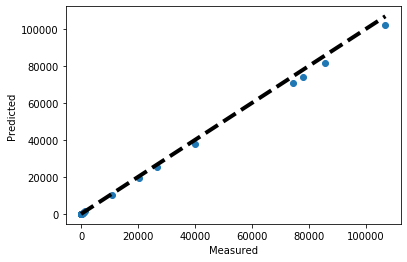

In [20]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[0], y_pred_mod[0])
ax.plot([y_test_mod[0].min(),y_test_mod[0].max()], [y_test_mod[0].min(), y_test_mod[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Deaths

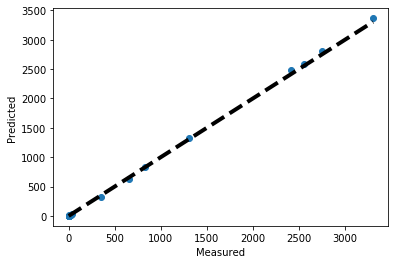

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[1], y_pred_mod[1])
ax.plot([y_test_mod[1].min(),y_test_mod[1].max()], [y_test_mod[1].min(), y_test_mod[1].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Cured

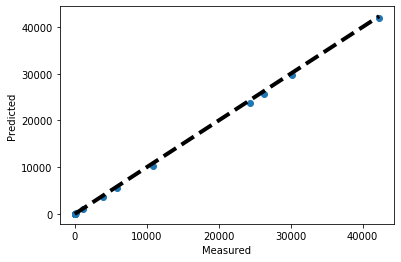

In [22]:
fig, ax = plt.subplots()
ax.scatter(y_test_mod[2], y_pred_mod[2])
ax.plot([y_test_mod[2].min(),y_test_mod[2].max()], [y_test_mod[2].min(), y_test_mod[2].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()